In [2]:
pip install pandas numpy scikit-learn xgboost matplotlib seaborn flask



   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.2 MB/s eta 0:00:48
    --------------------------------------- 0.8/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 0.8/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 898.8 kB/s eta 0:01:03
    --------------------------------------- 1.3/56.8 MB 919.0 kB/s eta 0:01:01
    --------------------------------------- 1.3/56.8 MB 919.0 kB/s eta 0:01:01
   - -------------------------------------- 1.6/56.8 MB 822.3 kB/s eta 0:01:08
   - -------------------------------------- 1.6/56.8 MB 822.3 kB/s eta 0:01:08
   - -------------------------------------- 1.6/56.8 MB 822.3 kB/s eta 0:01:08
   - -------------------------------------- 1.8/56.8 MB 708.8 kB/s eta 0:01:18
   - 

In [4]:
import pandas as pd

# Load your dataset
df = pd.read_csv('heart.csv') 

## Exploring Dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

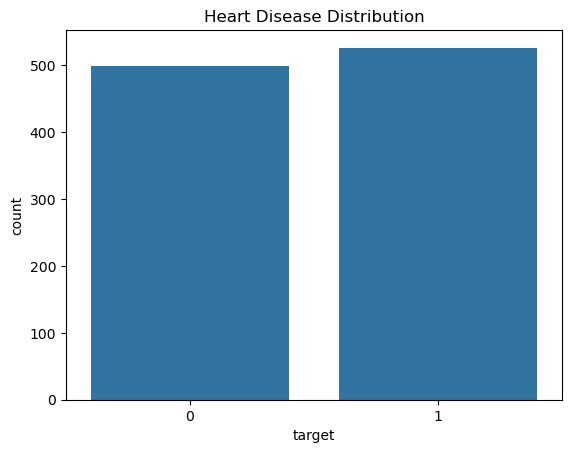

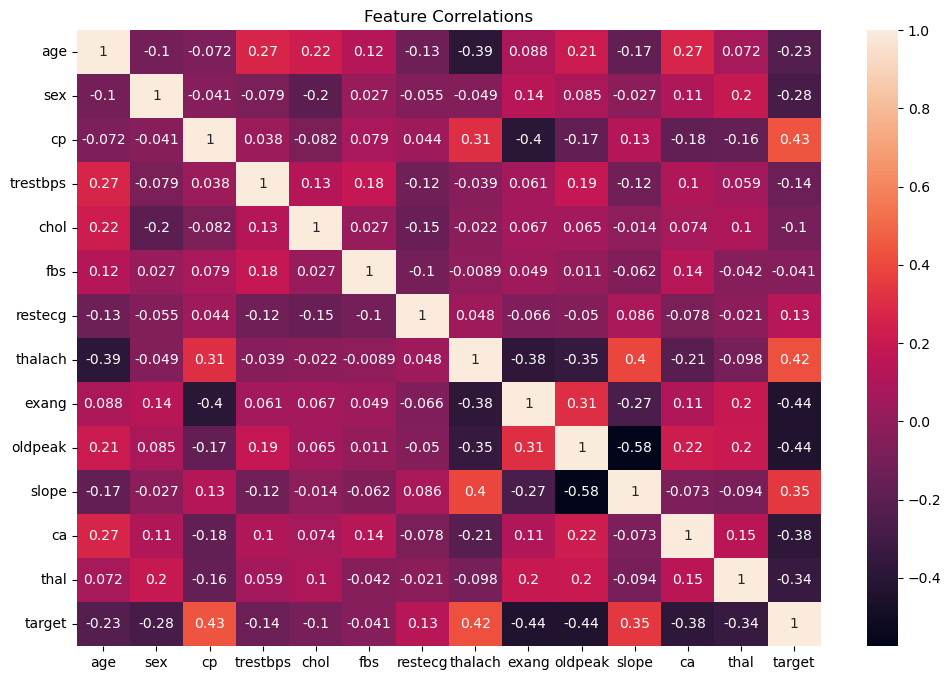

In [6]:
## Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of heart disease
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Feature Correlations')
plt.show()


In [8]:
## Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and label
X = df.drop('target', axis=1)
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
## Model Training & Evaluation

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


Random Forest accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

XGBoost accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [12]:
import pickle

# Save Random Forest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [14]:

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
